In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/OPERA_Data/VP_2.9_update.csv')

In [9]:
#read in /localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf using rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
mols_25 = []
mols = []
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf'):
    mols.append(mol)
    if mol.GetProp('VP Temperature') == '25':
        mols_25.append(mol)
print(len(mols),len(mols_25))

2819 2368


In [13]:
mols_to_tmps = {}
for mol in Chem.SDMolSupplier('/localhome/cschiebroek/MDFP_VP/mdfptools/carl/data_curation/OPERA_Data/VP_QR.sdf'):
    tmp = mol.GetProp('VP Temperature')
    #check if in dict
    if tmp in mols_to_tmps:
        mols_to_tmps[tmp].append(mol)
    else:
        mols_to_tmps[tmp] = [mol]
#get number of mols for each temperature
for key in mols_to_tmps:
    print(f'Temperature (°C): {key:>3}, Number of molecules: {len(mols_to_tmps[key]):>5}')


Temperature (°C):  25, Number of molecules:  2368
Temperature (°C):  20, Number of molecules:   287
Temperature (°C):  30, Number of molecules:    10
Temperature (°C):  23, Number of molecules:     9
Temperature (°C):  24, Number of molecules:     7
Temperature (°C):  21, Number of molecules:     4
Temperature (°C):  26, Number of molecules:     4
Temperature (°C):  31, Number of molecules:     1
Temperature (°C):  22, Number of molecules:     8
Temperature (°C):  29, Number of molecules:     4
Temperature (°C):  15, Number of molecules:     2
Temperature (°C):  19, Number of molecules:     1
Temperature (°C):  27, Number of molecules:     5
Temperature (°C):    , Number of molecules:   108
Temperature (°C):  28, Number of molecules:     1


In [5]:
mols_25
#make a df with some info on these: name, smiles, vp, temp, and a column for the mols
smiles = []
temps = []
vps = []
for mol in mols_25:
    smiles.append(Chem.MolToSmiles(mol))
    temps.append(mol.GetProp('VP Temperature'))
    vps.append(mol.GetProp('LogVP'))
df = pd.DataFrame({'SMILES':smiles,'Temp':temps,'VP':vps,'Mol':mols_25})
df

,SMILES,Temp,VP,Mol
0,CC(O)C(=O)O,25,-1.0898998391363903,<rdkit.Chem.rdchem.Mol object at 0x7f46ef27cf90>
1,O=C(O)c1c(Cl)ccc(Cl)c1Cl,25,-3.259600199653834,<rdkit.Chem.rdchem.Mol object at 0x7f46ef27d150>
2,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34,25,-8.26039996917038,<rdkit.Chem.rdchem.Mol object at 0x7f46ef27d1c0>
3,COC(=O)C1C(OC(=O)c2ccccc2)CC2CCC1N2C,25,-6.719000740988102,<rdkit.Chem.rdchem.Mol object at 0x7f46ef27d230>
4,O=C(O)c1cccc(Cl)c1Cl,25,-3.6420994407594938,<rdkit.Chem.rdchem.Mol object at 0x7f46ef27d2a0>
...,...,...,...,...
2363,FCC(F)(F)OC(F)F,25,2.5682005502965386,<rdkit.Chem.rdchem.Mol object at 0x7f46ef30e9d0>
2364,Clc1cc2c(oc3c(Cl)cccc32)c(Cl)c1Cl,25,-7.400099469202588,<rdkit.Chem.rdchem.Mol object at 0x7f46ef30ea40>
2365,OCCOc1ccc(N=Nc2ccccc2)cc1,25,-7.674899125794308,<rdkit.Chem.rdchem.Mol object at 0x7f46ef30eab0>
2366,Brc1ccc2c(c1)Oc1ccccc1O2,25,-4.522900460547318,<rdkit.Chem.rdchem.Mol object at 0x7f46ef30eb20>


In [6]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
df['standardized_smiles'] = df.apply(lambda row: Chem.MolToSmiles(rdMolStandardize.ChargeParent(Chem.MolFromSmiles((row['SMILES'])))), axis=1)

[15:35:22] Initializing MetalDisconnector
[15:35:22] Running MetalDisconnector
[15:35:22] Initializing Normalizer
[15:35:22] Running Normalizer
[15:35:22] Running LargestFragmentChooser
[15:35:22] Fragment: CC(O)C(=O)O
[15:35:22] New largest fragment: CC(O)C(=O)O (12)
[15:35:22] Running Uncharger
[15:35:22] Initializing MetalDisconnector
[15:35:22] Running MetalDisconnector
[15:35:22] Initializing Normalizer
[15:35:22] Running Normalizer
[15:35:22] Initializing MetalDisconnector
[15:35:22] Running MetalDisconnector
[15:35:22] Initializing Normalizer
[15:35:22] Running Normalizer
[15:35:22] Running LargestFragmentChooser
[15:35:22] Fragment: O=C(O)c1c(Cl)ccc(Cl)c1Cl
[15:35:22] New largest fragment: O=C(O)c1c(Cl)ccc(Cl)c1Cl (15)
[15:35:22] Running Uncharger
[15:35:22] Initializing MetalDisconnector
[15:35:22] Running MetalDisconnector
[15:35:22] Initializing Normalizer
[15:35:22] Running Normalizer
[15:35:22] Initializing MetalDisconnector
[15:35:22] Running MetalDisconnector
[15:35:22] 

In [7]:
import numpy as np
#rename VP to VP log mmHg
df = df.rename(columns={'VP':'VP log mmHg'})
#convert log mmHg to mmHg
df['VP mmHg'] = df['VP log mmHg'].apply(lambda x: 10**float(x))
#convert mmHg to Pa
df['VP Pa'] = df['VP mmHg'].apply(lambda x: x*133.322)
#convert Pa to logPa
df['VP logPa'] = df['VP Pa'].apply(lambda x: np.log10(x))
#drop VP log mmHg and VP mmHg
df = df.drop(columns=['VP Pa','VP mmHg'])
df
#save as csv
print(len(df))
df.to_csv('opera_full_25.csv')

2368


In [8]:
df_features =  pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/Current_set_2980_all_features_vp_in_log10_Pa.csv')
df_feauture_essentials = df_features[['molregno','vp_log10pa','Source','standardized_smiles','NumHeavyAtoms']]

(array([1.775e+03, 1.000e+00, 3.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

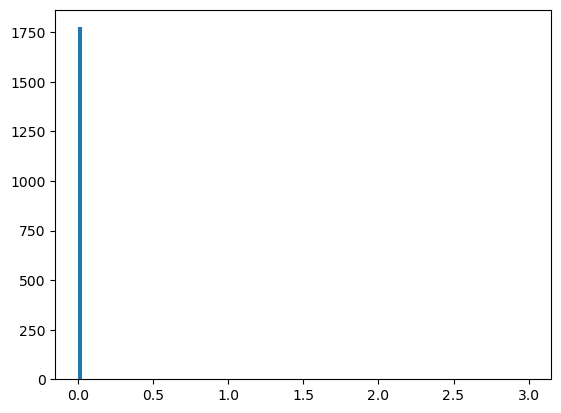

In [9]:
#merge on standardized smiles
df_merged = pd.merge(df, df_feauture_essentials, how='inner', on='standardized_smiles')
df_merged
#make column with difference between vp from opera and vp from chembl
df_merged['Abs diff opera'] = abs(df_merged['VP logPa'].astype(float) - df_merged['vp_log10pa'].astype(float))
#plot this difference
import matplotlib.pyplot as plt
plt.hist(df_merged['Abs diff opera'],bins=100)


In [10]:
df_merged = df_merged.sort_values(by=['Abs diff opera'],ascending=False)
df_merged.head(25)

,SMILES,Temp,VP log mmHg,Mol,standardized_smiles,VP logPa,molregno,vp_log10pa,Source,NumHeavyAtoms,Abs diff opera
216,c1ccc(-c2ccccc2)cc1,25,-2.0490999106336125,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2ca5e0>,c1ccc(-c2ccccc2)cc1,0.075802,424,3.075547,REACH,12,2.999745
1729,Cc1ccn2nc(S(=O)(=O)Nc3c(F)cccc3F)nc2n1,25,-11.5560005105457,<rdkit.Chem.rdchem.Mol object at 0x7f46ef307df0>,Cc1ccn2nc(S(=O)(=O)Nc3c(F)cccc3F)nc2n1,-9.431099,70,-12.000000,REACH,22,2.568901
1342,CCNc1nc(Cl)nc(NC(C)C)n1,25,-6.539100654496979,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2f59a0>,CCNc1nc(Cl)nc(NC(C)C)n1,-4.414199,4013,-6.096910,REACH,14,1.682711
1185,CCOP(C)(=O)OCC,25,-1.8760993812141034,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2ef610>,CCOP(C)(=O)OCC,0.248802,2863,1.747116,OCHEM,9,1.498313
633,O=C(c1ccccc1)C(O)c1ccccc1,25,-4.185999486581153,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2da650>,O=C(c1ccccc1)C(O)c1ccccc1,-2.061098,2275,-3.533132,REACH,16,1.472035
117,O=[N+]([O-])OCC(CO[N+](=O)[O-])(CO[N+](=O)[O-]...,25,-8.263600310252617,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2c6650>,O=[N+]([O-])OCC(CO[N+](=O)[O-])(CO[N+](=O)[O-]...,-6.138698,2787,-4.741559,OCHEM,21,1.397139
856,C1CSCCS1,25,-0.09690024149214271,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2e3a70>,C1CSCCS1,2.028002,4035,1.025269,OCHEM,6,1.002733
1612,CNC(=O)N(C)c1nnc(C(C)(C)C)s1,25,-5.699000406013823,<rdkit.Chem.rdchem.Mol object at 0x7f46ef3010e0>,CNC(=O)N(C)c1nnc(C(C)(C)C)s1,-3.574099,3978,-4.397977,OCHEM,15,0.823878
304,Cc1ccc(C(C)C)cc1,25,-0.4570499190981219,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2cdcb0>,Cc1ccc(C(C)C)cc1,1.667852,440,2.300993,PUBCHEM,10,0.633141
286,CC(C)(C)c1ccc(O)cc1,25,-1.4194000118410193,<rdkit.Chem.rdchem.Mol object at 0x7f46ef2cd2a0>,CC(C)(C)c1ccc(O)cc1,0.705502,2514,0.088217,PUBCHEM,11,0.617284


In [11]:
abs_difs = df_merged['Abs diff opera'].tolist()
len([d for d in abs_difs if d > 1])

7

In [12]:
df_merged_full = pd.merge(df, df_features, how='inner', on='standardized_smiles')
df_merged_full
#save to df
df_merged_full.to_csv('merged_opera.csv')

In [13]:
#okay, now I actually want to look at prediction error of only 2d vs only mdfp per mol, and look at the difference
from sklearn.utils import shuffle

df = df_merged_full
params = { #hyperparameters optimized by Working Wang
    'max_depth':5,
    'min_child_weight': 5,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
}
import numpy as np
from sklearn.model_selection import GroupKFold, KFold,RepeatedKFold
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# gkf = GroupKFold(n_splits=5)
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0)

RDKit_feature_names = pd.read_pickle('/localhome/cschiebroek/MDFPs/mdfptools/carl/data/outputs/RDKit_2D_descriptors.pkl')
mdfp_features_all = ['NumHeavyAtoms', 'NumRotatableBonds', 'NumN', 'NumO', 'NumF', 'NumP', 'NumS', 'NumCl', 'NumBr', 'NumI', 'water_intra_crf_mean', 'water_intra_crf_std', 'water_intra_crf_median', 'water_intra_lj_mean', 'water_intra_lj_std', 'water_intra_lj_median', 'water_total_crf_mean', 'water_total_crf_std', 'water_total_crf_median', 'water_total_lj_mean', 'water_total_lj_std', 'water_total_lj_median', 'water_intra_ene_mean', 'water_intra_ene_std', 'water_intra_ene_median', 'water_total_ene_mean', 'water_total_ene_std', 'water_total_ene_median', 'water_rgyr_mean', 'water_rgyr_std', 'water_rgyr_median', 'water_sasa_mean', 'water_sasa_std', 'water_sasa_median']
combined_features = RDKit_feature_names + mdfp_features_all
# y = df['vp_log10pa']  
params = params
output = ([],[],[],[],[],[])
selection_2d_features = RDKit_feature_names



shuffled_data = shuffle(df, random_state=0)

X_mdfp = shuffled_data[mdfp_features_all]
X_mdfp = StandardScaler().fit_transform(X_mdfp)
X_2d = shuffled_data[selection_2d_features]
X_2d = StandardScaler().fit_transform(X_2d)
x_combined = shuffled_data[combined_features]
x_combined = StandardScaler().fit_transform(x_combined)
y = shuffled_data['VP logPa'].to_numpy()
molregno_df = shuffled_data['molregno'].to_numpy()
confid_df = shuffled_data['confid'].to_numpy()

for fold, (train_idx, test_idx) in enumerate(rkf.split(shuffled_data, groups=shuffled_data['molregno'])):

    #get the train and test data
    X_train_mdfp = X_mdfp[train_idx]
    X_test_mdfp = X_mdfp[test_idx]
    X_train_2d = X_2d[train_idx]
    X_test_2d = X_2d[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    X_train_combined = x_combined[train_idx]
    X_test_combined = x_combined[test_idx]

    molregnos_test = molregno_df[test_idx]
    confids_test = confid_df[test_idx]

    #test if there is no overlap between train and test molregnos
    assert len(set(molregno_df[train_idx]).intersection(set(molregno_df[test_idx]))) == 0




    # Create DMatrix for training and testing
    dtrain_mdfp = xgb.DMatrix(X_train_mdfp, label=y_train)
    dtest_mdfp = xgb.DMatrix(X_test_mdfp, label=y_test)

    dtrain_2d = xgb.DMatrix(X_train_2d, label=y_train)
    dtest_2d = xgb.DMatrix(X_test_2d, label=y_test)

    dtrain_combined = xgb.DMatrix(X_train_combined, label=y_train)
    dtest_combined = xgb.DMatrix(X_test_combined, label=y_test)


    model_mdfp = xgb.train(
        params,
        dtrain_mdfp,
        num_boost_round=999,
        evals=[(dtest_mdfp, "Test")],
        early_stopping_rounds=10,
        verbose_eval=False

    )

    model_2d = xgb.train(
        params,
        dtrain_2d,
        num_boost_round=999,
        evals=[(dtest_2d, "Test")],
        early_stopping_rounds=10,
        verbose_eval=False

    )

    model_combined = xgb.train(
        params,
        dtrain_combined,
        num_boost_round=999,
        evals=[(dtest_combined, "Test")],
        early_stopping_rounds=10,
        verbose_eval=False

    )

    pp_mdfp = model_mdfp.predict(dtest_mdfp)
    pp_2d = model_2d.predict(dtest_2d)
    pp_combined = model_combined.predict(dtest_combined)

    output[0].append(y_test)
    output[1].append(pp_mdfp)
    
    output[2].append(molregnos_test)
    output[3].append(confids_test)
    output[4].append(pp_2d)
    output[5].append(pp_combined)

    rmse_mdfp = np.sqrt(mean_squared_error(y_test, pp_mdfp, squared=False))
    rmse_2d = np.sqrt(mean_squared_error(y_test, pp_2d, squared=False))
    rmse_combined = np.sqrt(mean_squared_error(y_test, pp_combined, squared=False))
    print(f"Fold {fold + 1}: MDFP RMSE = {rmse_mdfp}, 2D RMSE = {rmse_2d}, combined RMSE = {rmse_combined}")



Fold 1: MDFP RMSE = 0.994906108145966, 2D RMSE = 0.9398381150525902, combined RMSE = 0.979812662470723
Fold 2: MDFP RMSE = 0.9828776882686557, 2D RMSE = 0.9216680135274313, combined RMSE = 0.9211601155745004
Fold 3: MDFP RMSE = 0.9995313817685753, 2D RMSE = 0.911478409873033, combined RMSE = 0.921039966242558
Fold 4: MDFP RMSE = 1.0007257532261282, 2D RMSE = 0.9791574186801708, combined RMSE = 0.9736615515690813
Fold 5: MDFP RMSE = 0.9593805994321793, 2D RMSE = 0.9526300711791522, combined RMSE = 0.9236991833099807
Fold 6: MDFP RMSE = 0.9486921411322929, 2D RMSE = 0.8880948440750607, combined RMSE = 0.9074169463069615
Fold 7: MDFP RMSE = 0.8980221448631788, 2D RMSE = 0.9017021212639297, combined RMSE = 0.9100219159469155
Fold 8: MDFP RMSE = 1.0563990094965736, 2D RMSE = 1.00713768635461, combined RMSE = 0.9698298229525196
Fold 9: MDFP RMSE = 1.009349459001911, 2D RMSE = 0.8935255359064944, combined RMSE = 0.9077276825462343
Fold 10: MDFP RMSE = 1.0566383685179304, 2D RMSE = 1.034779045

In [14]:
y_test_nested = output[0]
pp_mdfp_nested = output[1]
molregnos_test_nested = output[2]
confids_test_nested = output[3]
pp_2d_nested = output[4]
pp_combined_nested = output[5]

df_template = pd.DataFrame({'Prediction': [], 'Experimental': [], 'molregno': [], 'confid': [], 'fold': []})
df_mdfp = df_template.copy()
df_2d = df_template.copy()
df_combined = df_template.copy()

for fold in range(len(y_test_nested)):
    df_mdfp = pd.concat([df_mdfp, pd.DataFrame({'Prediction': pp_mdfp_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
    df_2d = pd.concat([df_2d, pd.DataFrame({'Prediction': pp_2d_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
    df_combined = pd.concat([df_combined, pd.DataFrame({'Prediction': pp_combined_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
    


/tmp/ipykernel_2625327/3431721356.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_mdfp = pd.concat([df_mdfp, pd.DataFrame({'Prediction': pp_mdfp_nested[fold], 'Experimental': y_test_nested[fold], 'molregno': molregnos_test_nested[fold], 'confid': confids_test_nested[fold], 'fold': fold})])
/tmp/ipykernel_2625327/3431721356.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_2d = pd.concat([df_2d, pd.DataFrame({'Prediction': pp_2d_nested[fold], 'Experimental': y_test_nested[fold], 'mo

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

def getStatValues_v2(x,y,treshold=1):
    RMSE = mean_squared_error(np.array(x), np.array(y), squared=False)
    MAE = mean_absolute_error(np.array(x), np.array(y))
    EBO = np.mean(np.abs(np.array(x) - np.array(y)) < treshold)
    KT = stats.kendalltau(x, y)[0]
    #add coefficient of determination
    r2 = r2_score(np.array(x), np.array(y))



    return RMSE, MAE, EBO, KT, r2
    

def density_plot_multiple_custom(reals, predictions,molregnos, print_stats=True, bounds=None, titles=None,global_title=None,print_spearman=False):
    num_plots = len(reals)
    print(f'making {num_plots} plots')
    num_cols = min(num_plots, 3)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed for the grid
    #if you cant devide by 3, but can divide by 2, do two rows
    if num_plots % 3 != 0 and num_plots % 2 == 0:
        num_rows = 2
        num_cols = 2   
    if num_plots == 4:
        num_rows = 2
        num_cols = 2
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D
    
    for i in range(num_plots):
        print(f'plot {i+1} of {num_plots}')
        real = reals[i]
        prediction = predictions[i]
        rmses,maes,ebos,kts,r2s = [],[],[],[],[]
        for r,p in zip(real,prediction):
            RMSE, MAE, EBO, KT,R2 = getStatValues_v2(r, p)
            rmses.append(RMSE)
            maes.append(MAE)
            ebos.append(EBO)
            kts.append(KT)
            r2s.append(R2)

        rmse_90_low,rmse_90_high = stats.norm.interval(confidence=0.90, 
                 loc=np.mean(rmses), 
                 scale=stats.sem(rmses)) 
        rmse_mean = np.mean(rmses)
        mae_90_low,mae_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(maes), 
                    scale=stats.sem(maes))
        mae_mean = np.mean(maes)
        ebo_90_low,ebo_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(ebos), 
                    scale=stats.sem(ebos))
        ebo_mean = np.mean(ebos)
        kt_90_low,kt_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(kts), 
                    scale=stats.sem(kts))
        kt_mean = np.mean(kts)

        r2_90_low,r2_90_high = stats.norm.interval(confidence=0.90,
                    loc=np.mean(r2s), 
                    scale=stats.sem(r2s))
        r2_mean = np.mean(r2s)
        
                                             
        molregno = molregnos[i]

        mrn = [item for sublist in molregno for item in sublist]
        real = [item for sublist in real for item in sublist]
        prediction = [item for sublist in prediction for item in sublist]
        # #make df of these three, and average over molregno
        df = pd.DataFrame({'molregno': mrn, 'real': real, 'prediction': prediction})
        df = df.groupby('molregno').mean()
        real = df['real'].tolist()
        prediction = df['prediction'].tolist()


        print(f'{len(real)} points')
        
        ax = axes[i]
        
        if bounds is None:
            lower = min(prediction + real) - 2
            upper = max(prediction + real) + 2
        else:
            lower = bounds[0]
            upper = bounds[1]
        
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real), max(prediction + real)], 'k-')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) - 1, max(prediction + real) - 1], 'k--')
        ax.plot([min(prediction + real), max(prediction + real)], [min(prediction + real) + 1, max(prediction + real) + 1], 'k--')
        import statsmodels.api as sm
        dens_u = sm.nonparametric.KDEMultivariate(data=[real, prediction], var_type='cc', bw='normal_reference')
        z = dens_u.pdf([real, prediction])

        sc = ax.scatter(real, prediction, lw=0, c=z, s=10, alpha=0.9)

        ax.set_xlabel(r'Exp. VP (log10 Pa)', fontsize=14)
        ax.set_ylabel(r'Predicted VP (log10 Pa)', fontsize=14)
        ax.grid(True, which="both")
        ax.axis([lower, upper, lower, upper])
        # ax.text(0.05, 0.95, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMAE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})', transform=ax.transAxes, fontsize=10, verticalalignment='top')
        text_box = ax.text(0.05, 0.25, f'RMSE: {rmse_mean:.2f} ({rmse_90_low:.2f}-{rmse_90_high:.2f}) \nMAE: {mae_mean:.2f} ({mae_90_low:.2f}-{mae_90_high:.2f})\nFraction errors < 1: {ebo_mean:.2f} ({ebo_90_low:.2f}-{ebo_90_high:.2f})\nKendalls Tau: {kt_mean:.2f} ({kt_90_low:.2f}-{kt_90_high:.2f})\nR2: {r2_mean:.2f} ({r2_90_low:.2f}-{r2_90_high:.2f})', transform=ax.transAxes, fontsize=10, verticalalignment='top',
                    # transform=ax.transAxes, fontsize=10, verticalalignment='top',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
        
        if titles is not None and len(titles) > i:
            ax.set_title(titles[i], fontsize=14)
        ax.set_aspect('equal', 'box')
    
    # Remove any unused subplots
    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])
    if global_title is not None:
        fig.suptitle(global_title, fontsize=16)
    
    # plt.tight_layout()
    plt.savefig('../tmp_data/physchem_vs_mdfp.png', dpi=600)
    plt.show()

making 3 plots
plot 1 of 3
1803 points
plot 2 of 3
1803 points
plot 3 of 3
1803 points


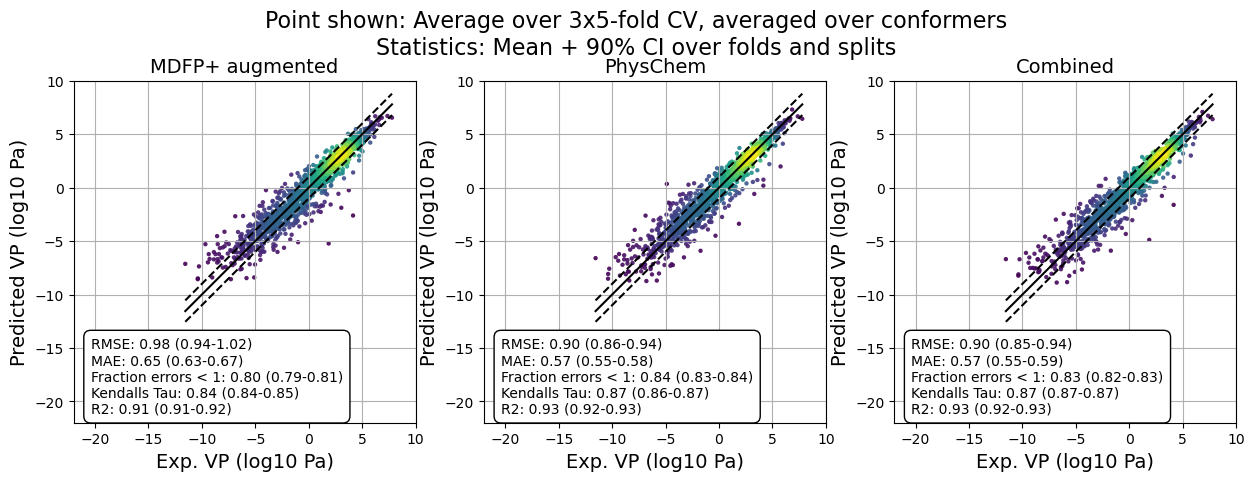

In [16]:
#make nested lists for pred and real, nested by split index
preds_mdfp_nested, preds_2d_nested, preds_combined_nested = [], [], []
test_y_mdfp_nested, test_y_2d_nested, test_y_combined_nested = [], [], []
molregnos_mdfp_nested, molregnos_2d_nested, molregnos_combined_nested = [], [], []

for i in range(len(y_test_nested)):
    df_preds_mdfp_split = df_mdfp[df_mdfp['fold'] == i]
    df_preds_2d_split = df_2d[df_2d['fold'] == i]
    df_preds_combined_split = df_combined[df_combined['fold'] == i]


    preds_mdfp = df_preds_mdfp_split['Prediction'].tolist()
    preds_2d = df_preds_2d_split['Prediction'].tolist()
    preds_combined = df_preds_combined_split['Prediction'].tolist()

    test_mdfp = df_preds_mdfp_split['Experimental'].tolist()
    test_2d = df_preds_2d_split['Experimental'].tolist()
    test_combined = df_preds_combined_split['Experimental'].tolist()

    molregnos_mdfp = df_preds_mdfp_split['molregno'].tolist()
    molregnos_2d = df_preds_2d_split['molregno'].tolist()
    molregnos_combined = df_preds_combined_split['molregno'].tolist()


    preds_mdfp_nested.append(preds_mdfp)
    preds_2d_nested.append(preds_2d)
    preds_combined_nested.append(preds_combined)

    test_y_mdfp_nested.append(test_mdfp)
    test_y_2d_nested.append(test_2d)
    test_y_combined_nested.append(test_combined)

    molregnos_mdfp_nested.append(molregnos_mdfp)
    molregnos_2d_nested.append(molregnos_2d)
    molregnos_combined_nested.append(molregnos_combined)



pred_nested = [preds_mdfp_nested, preds_2d_nested, preds_combined_nested]
real_nested = [test_y_mdfp_nested, test_y_2d_nested, test_y_combined_nested]
molregnos_nested = [molregnos_mdfp_nested, molregnos_2d_nested, molregnos_combined_nested]
titles = ['MDFP+ augmented','PhysChem','Combined']
density_plot_multiple_custom(real_nested, pred_nested, molregnos=molregnos_nested,titles=titles,bounds = [-22,10], print_stats=False,global_title="Point shown: Average over 3x5-fold CV, averaged over conformers\nStatistics: Mean + 90% CI over folds and splits")

In [17]:
#make df of these three, and average over molregno
preds_mdfp_flat = [item for sublist in preds_mdfp_nested for item in sublist]
preds_2d_flat = [item for sublist in preds_2d_nested for item in sublist]
preds_combined_flat = [item for sublist in preds_combined_nested for item in sublist]
real_mdfp_flat = [item for sublist in test_y_mdfp_nested for item in sublist]
real_2d_flat = [item for sublist in test_y_2d_nested for item in sublist]
real_combined_flat = [item for sublist in test_y_combined_nested for item in sublist]
molregnos_mdfp_flat = [item for sublist in molregnos_mdfp_nested for item in sublist]
molregnos_2d_flat = [item for sublist in molregnos_2d_nested for item in sublist]
molregnos_combined_flat = [item for sublist in molregnos_combined_nested for item in sublist]
df_mdfp = pd.DataFrame({'molregno': molregnos_mdfp_flat, 'real': real_mdfp_flat, 'prediction': preds_mdfp_flat})
df_2d = pd.DataFrame({'molregno': molregnos_2d_flat, 'real': real_2d_flat, 'prediction': preds_2d_flat})
df_combined = pd.DataFrame({'molregno': molregnos_combined_flat, 'real': real_combined_flat, 'prediction': preds_combined_flat})
#average over molregno
df_mdfp = df_mdfp.groupby('molregno').mean()
df_2d = df_2d.groupby('molregno').mean()
df_combined = df_combined.groupby('molregno').mean()

# #merge on molregno
df_merged = pd.merge(df_mdfp, df_2d, how='inner', on='molregno')
df_merged = pd.merge(df_merged, df_combined, how='inner', on='molregno')
df_merged = df_merged.rename(columns={'real_x':'real_mdfp','prediction_x':'prediction_mdfp','real_y':'real_2d','prediction_y':'prediction_2d','real':'real_combined','prediction':'prediction_combined'})
df_merged
#drop real_mdfp and real_2d, rename real_combined to experimental
df_merged = df_merged.drop(columns=['real_mdfp','real_2d'])
df_merged = df_merged.rename(columns={'real_combined':'experimental'})
df_merged.head(50)


,prediction_mdfp,prediction_2d,experimental,prediction_combined
molregno,,,,
1.0,3.928045,3.941750,4.101702,3.951618
8.0,-2.533070,-2.228149,-3.053298,-2.258379
9.0,3.435697,3.616268,3.593202,3.767045
11.0,5.146139,4.986890,5.259101,5.174339
12.0,-3.779807,-4.049299,-3.104198,-3.717210
13.0,3.530161,3.125325,3.664201,3.220488
18.0,2.989325,3.008041,3.252703,3.157604
19.0,2.860316,2.861416,3.150204,2.753113
20.0,-6.309317,-7.310545,-4.554298,-6.675523


In [24]:
import numpy as np
import math 

def sturge_optimal_bins(data: np.array) -> int:
    """ Sturge's rule for optimal bin selection
    Parameters: 
        data (np.array) - a one-dimensional array with data
    Returns:
        nbins (int) - number of bins
    """
    assert data.ndim == 1
    n = data.size
    width = 1.0 + np.log2(n)
    
    nbins = math.ceil((data.max() - data.min()) / width)
    nbins = max(1, nbins)
    
    return nbins

nbins = sturge_optimal_bins(df_merged_full['vp_log10pa'])
nbins

2

KstestResult(statistic=0.12869620729060813, pvalue=1.1229275829506593e-16, statistic_location=-0.5800000000000001, statistic_sign=-1)

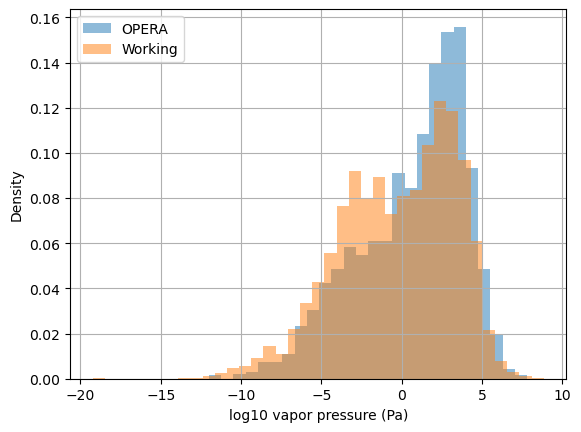

In [26]:
#do overlaying histograms of vapor pressure in this set and in df_features
df_merged_full['vp_log10pa'].hist(bins='fd', alpha=0.5,density = True, label='OPERA')
df_features['vp_log10pa'].hist(bins='fd', alpha=0.5,density = True, label='Working')
plt.legend()
plt.xlabel('log10 vapor pressure (Pa)')
plt.ylabel('Density')
#are they significantly different? do KS test
from scipy.stats import ks_2samp
ks_2samp(df_merged_full['vp_log10pa'],df_features['vp_log10pa'])

Text(0, 0.5, 'count')

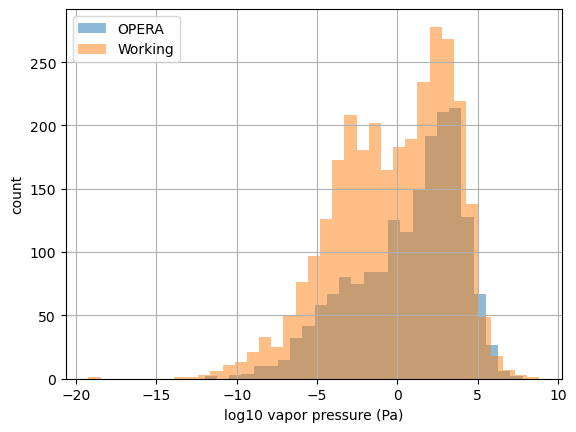

In [27]:
df_merged_full['vp_log10pa'].hist(bins='fd', alpha=0.5,density = False, label='OPERA')
df_features['vp_log10pa'].hist(bins='fd', alpha=0.5,density = False, label='Working')
plt.legend()
plt.xlabel('log10 vapor pressure (Pa)')
plt.ylabel('count')

In [ ]:
#how many in df_features with vp_log10pa < -5?
print(len(df_features[df_features['vp_log10pa'] < -5]))
print(len(df[df['vp_log10pa'] < -5]))


318
128


In [ ]:
#and if we do the same split?


,confid,molregno,mdfp,NumHeavyAtoms,NumRotatableBonds,NumN,NumO,NumF,NumP,NumS,...,logp,logp_metadata,vp_log10pa,vp_metadata,SMILES,hash_code,Temperature,Vapour Pressure (log10 kPa),Source,standardized_smiles
0,2298,1,"[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.4462820500696...",6,0,0,0,0,0,0,...,0,{},4.100855,"{'SMILES': '[cH]1:[cH]:[cH]:[cH]:[cH]:[cH]:1',...",[cH]1:[cH]:[cH]:[cH]:[cH]:[cH]:1,60c5fa2eb3046aca250f27ede97fbe7a,298.15,1.100855,PUBCHEM;OCHEM,c1ccccc1
1,1228,6,"[30, 19, 0, 6, 0, 0, 0, 0, 0, 0, 110.748466359...",30,19,0,6,0,0,0,...,0,{},-11.744727,{'SMILES': '[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,[CH3]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2...,000c0dc393452e54c19cae2c6501b956,298.15,-14.744727,REACH,CCCCCCCCCCCCCCCCCC(=O)OCC(O)[C@H]1OC[C@@H](O)[...
2,1150,7,"[9, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7.3614322526332...",9,5,0,0,0,0,0,...,0,{},2.698933,{'SMILES': '[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-...,[CH3]-[CH]=[CH]-[CH2]-[CH2]-[CH2]-[CH2]-[CH2]-...,0026cd05c00286506e4c0051abcde83f,298.15,-0.301067,PUBCHEM,CC=CCCCCCC
3,1151,8,"[13, 1, 0, 2, 0, 0, 0, 0, 0, 0, -97.7987770071...",13,1,0,2,0,0,0,...,0,{},-3.053323,{'SMILES': '[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2...,[O]=[C](-[OH])-[c]1:[cH]:[cH]:[c]2:[cH]:[cH]:[...,0029fb907f0382cb8ba7913301e791ec,298.15,-6.053323,OCHEM,O=C(O)c1ccc2ccccc2c1
4,1152,9,"[5, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0.4848459757350...",5,2,0,1,0,0,0,...,0,{},3.591625,"{'SMILES': '[Cl]-[CH2]-[O]-[CH2]-[Cl]', 'Sourc...",[Cl]-[CH2]-[O]-[CH2]-[Cl],0050ebd8f62aa0dd9dd972b02e277f5b,298.15,0.591625,OCHEM,ClCOCCl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2975,4238,4240,"[18, 2, 0, 1, 0, 0, 0, 0, 5, 0, -20.9569257949...",18,2,0,1,0,0,0,...,0,{},-4.301899,{'SMILES': '[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c...,[Br]-[c]1:[c](-[Br]):[c](-[Br]):[c](-[O]-[c]2:...,ff30c14ff5df02fc6b4207673283ed0b,298.15,-7.301899,OCHEM,Brc1c(Br)c(Br)c(Oc2ccccc2)c(Br)c1Br
2976,4239,4241,"[17, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0.034004099168...",17,0,0,1,0,0,0,...,0,{},-5.356584,{'SMILES': '[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]...,[Cl]-[c]1:[cH]:[c](-[Cl]):[c]2:[o]:[c]3:[c](-[...,ff3ac5bdeb6e4683f822395b116dda7f,298.15,-8.356584,OCHEM,Clc1cc(Cl)c2oc3c(Cl)c(Cl)ccc3c2c1
2977,4240,4242,"[19, 2, 0, 1, 0, 0, 0, 6, 0, 0, -30.8042543707...",19,2,0,1,0,0,0,...,0,{},-3.770000,{'SMILES': '[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:...,[Cl]-[c]1:[cH]:[cH]:[c](-[O]-[c]2:[cH]:[c](-[C...,ff4e979f0b36ff50fd00e1edd51b6f76,298.15,-6.770000,OCHEM,Clc1ccc(Oc2cc(Cl)c(Cl)c(Cl)c2Cl)c(Cl)c1
2978,4241,4243,"[5, 0, 0, 0, 3, 0, 0, 1, 0, 0, -0.004587864253...",5,0,0,0,3,0,0,...,0,{},6.457729,"{'SMILES': '[F]-[C](-[F])(-[F])-[Cl]', 'Source...",[F]-[C](-[F])(-[F])-[Cl],ff58752f0a4348832f35917fb8a400b7,298.15,3.457729,OCHEM,FC(F)(F)Cl


In [25]:
3042-2981

61

In [47]:
opera_full_25 = pd.read_csv('opera_full_25.csv')
print(len(opera_full_25))

2368


2980 2368


Text(0, 0.5, 'count')

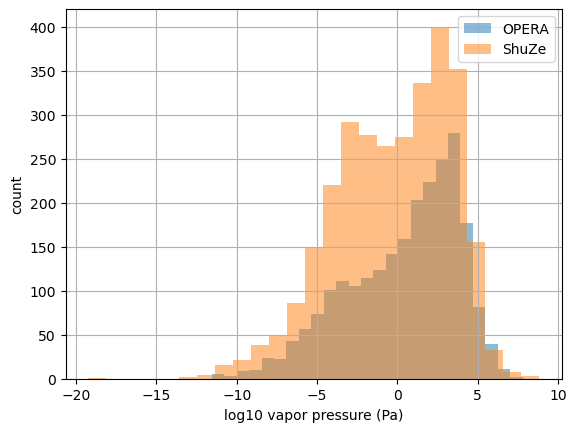

In [51]:
opera_full_25['VP logPa'].hist(bins=25, alpha=0.5,density = False, label='OPERA')
df_features['vp_log10pa'].hist(bins=25, alpha=0.5,density = False, label='Working')
print(len(df_features),len(opera_full_25))
plt.legend()
plt.xlabel('log10 vapor pressure (Pa)')
plt.ylabel('count')

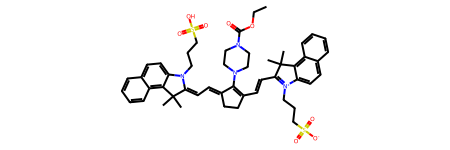

In [65]:
opera_full_25['NumHeavyAtoms'] = opera_full_25['SMILES'].apply(lambda x: Chem.MolFromSmiles(x).GetNumHeavyAtoms())
opera_full_25.sort_values(by=['NumHeavyAtoms'],ascending=False,inplace=True)
smiles = opera_full_25['SMILES'].tolist()
Chem.MolFromSmiles(smiles[0])

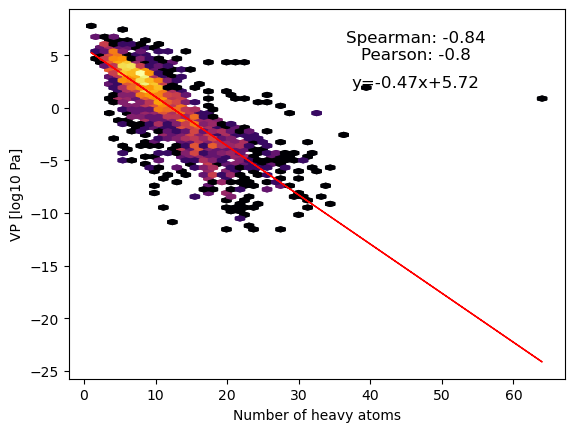

In [58]:
#density scatter pplot of heavy atoms vs vp
# plot vp against number of heavy atoms
import matplotlib.pyplot as plt
import numpy as np
hexbin = plt.hexbin(opera_full_25['NumHeavyAtoms'], opera_full_25['VP logPa'], gridsize=50, cmap='inferno', bins='log', mincnt=1)
counts = plt.hexbin(opera_full_25['NumHeavyAtoms'], opera_full_25['VP logPa'], gridsize=50, cmap='inferno', bins='log', mincnt=1).get_array()
spearman = opera_full_25['NumHeavyAtoms'].corr(opera_full_25['VP logPa'], method='spearman')
pearson = opera_full_25['NumHeavyAtoms'].corr(opera_full_25['VP logPa'], method='pearson')
plt.text(0.7, 0.9, f'Spearman: {np.round(spearman, 2)}\nPearson: {np.round(pearson, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
#add liniear regression line and formula
from scipy import stats
x = opera_full_25['NumHeavyAtoms']
y = opera_full_25['VP logPa']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*x+intercept
plt.plot(x,line,'r-', linewidth=1)
plt.text(0.7, 0.8, f'y={np.round(slope, 2)}x+{np.round(intercept, 2)}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Number of heavy atoms')
plt.ylabel('VP [log10 Pa]')
plt.savefig('vp_vs_numheavyatoms.png', dpi=300)
plt.show()

EPA Product Properties Test Guidelines OPPTS 830.7950 Vapor Pressure:
"There is no single vapor pressure measurment procedure applicable to the entire range of vapor pressures. Therefore, several methods are recommended for the measurement of vapor pressure from 10^-3 Pa to 10^5 Pa. The OECD Laboratory Intercomparison Testing Programme showed that gas saturation method may allow measurements of considerably lower vapor pressure (as low as approximately 10^-5 Pa). Vapor pressure testing is not 

In [68]:
# for f in RDKit_feature_names:
#     print(f)
print(len(RDKit_feature_names))

209
